

# LAB 2 - LINEAR REGRESSION IN PYTHON

This lab is comprised of two main parts. We will see two ways of running Multiple Linear Regression:
- 1. MLR with only numerical variables
- 2. MLR with numerical + categorical variables

We will use the Linear Regression package from the `statsmodels` library. This library includes a variety of functions that are helpful for data exploration and statiscal models, its documentation can be found here: https://www.statsmodels.org/stable/index.html. 

For data visualization, we will first introduce `seaborn` (https://seaborn.pydata.org), which provides a high-level interface for drawing attractive and informative statistical graphics. Later, we will gradually pick up `matplotlib`, which is a more foundamental and versatile library for plotting in `Python`. 


For all packages mentioned above, if you have not done so already, you need to install the package. A common approach is to use `conda` or `pip`. In the terminal, type the following commands to install `statsmodels` (change the package name to install other packages):
- 1. `conda install -c conda-forge statsmodels`, or
- 2. `pip install statsmodels`

More specifically, we will use Linear Regression to predict the quality of the wines as measured by their 'Auction Index'




In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

%matplotlib inline

As in the previous Lab, we use pandas to read the data from a `.csv` file, and consolidate it into a `Dataframe` object.

In [2]:
wine = pd.read_csv('wine_agg.csv')
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             46 non-null     int64  
 1   LogAuctionIndex  46 non-null     float64
 2   WinterRain       46 non-null     float64
 3   HarvestRain      46 non-null     float64
 4   GrowTemp         46 non-null     float64
 5   HarvestTemp      46 non-null     float64
 6   Age              46 non-null     int64  
 7   FrancePop        46 non-null     float64
 8   USAlcConsump     46 non-null     float64
dtypes: float64(7), int64(2)
memory usage: 3.4 KB


In [3]:
wine.head(5)

,Year,LogAuctionIndex,WinterRain,HarvestRain,GrowTemp,HarvestTemp,Age,FrancePop,USAlcConsump
0,1952,7.4950,566.4,165.5,17.28,14.39,63,42.46,7.85
1,1953,8.0393,653.3,75.6,16.94,17.64,62,42.75,8.03
2,1955,7.6858,504.3,129.5,17.30,17.13,60,43.43,7.84
3,1957,6.9845,390.8,110.4,16.31,16.47,58,44.31,7.77
4,1958,6.7772,538.8,187.0,16.82,19.72,57,44.79,7.74


/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


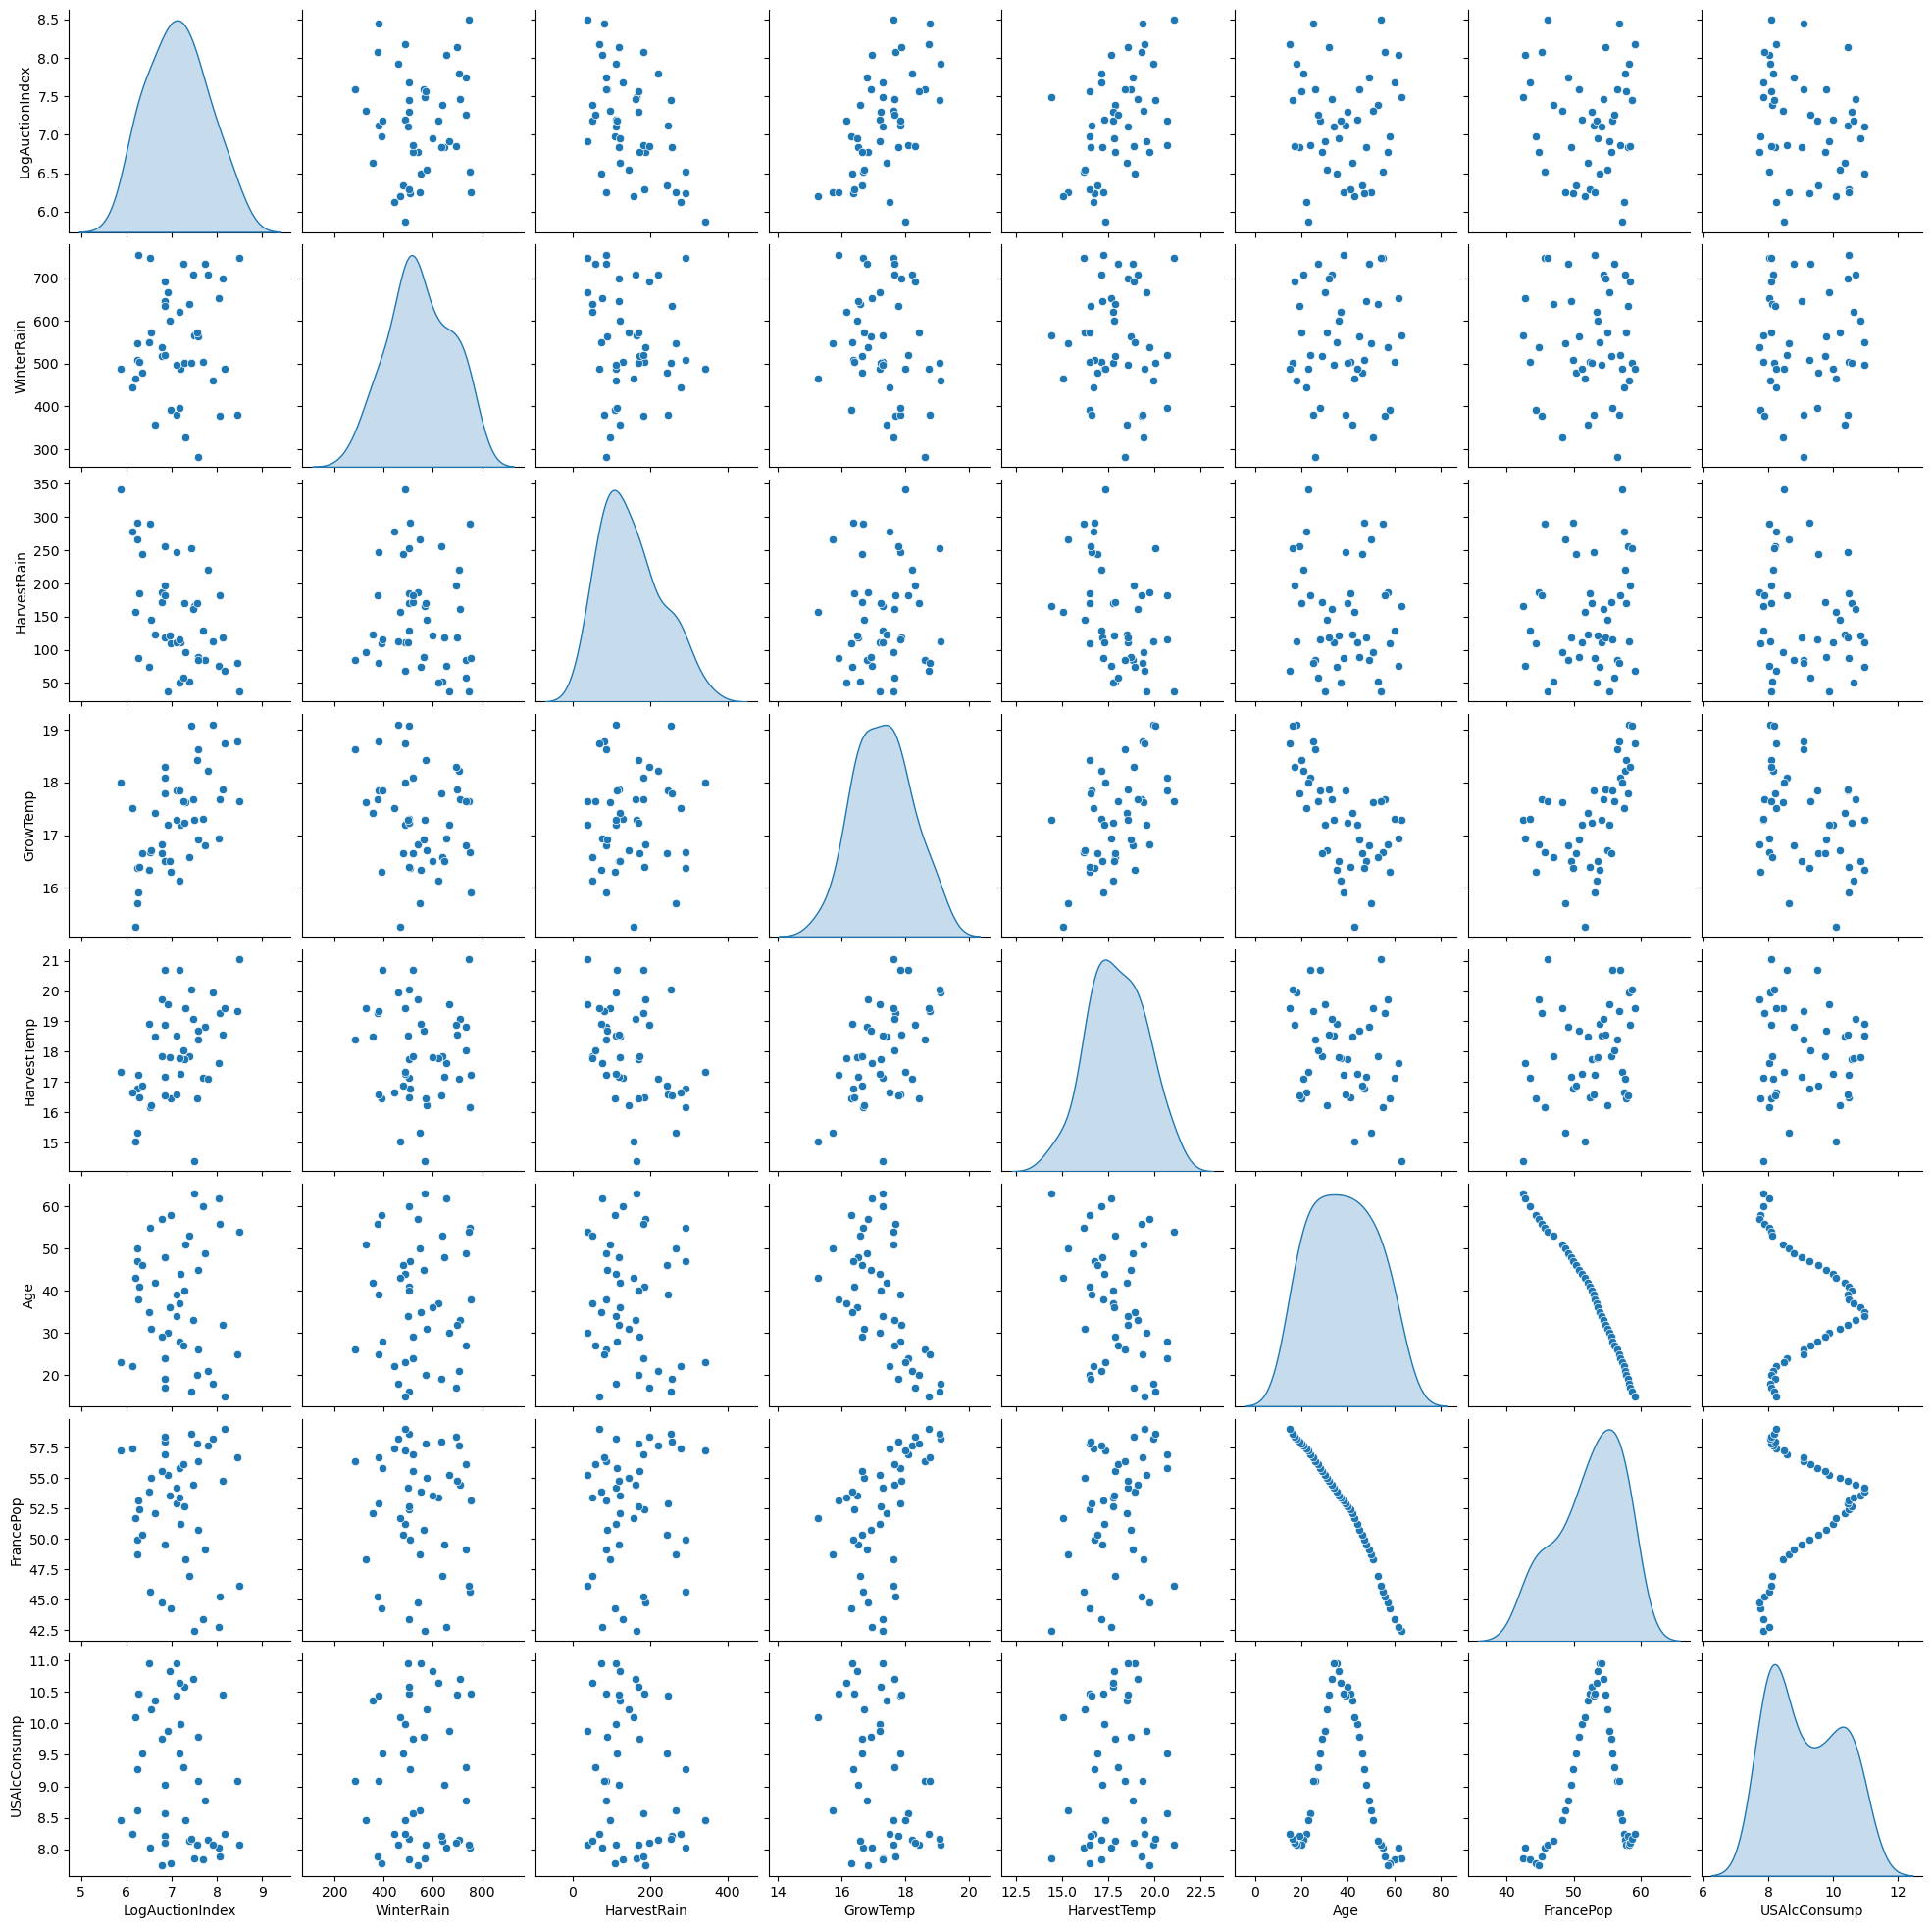

In [4]:
# Plot scatter matrix for each pair of variables off diagonal and the histograms (or density plots) on the diagonal
# In ggplot2 in R, one can use ggscatmat, which also prints the correlation in the upper triangle.
import seaborn as sns

sns.pairplot(wine.iloc[:,1:9],diag_kind='kde') # try diag_kind='hist' for histograms

/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


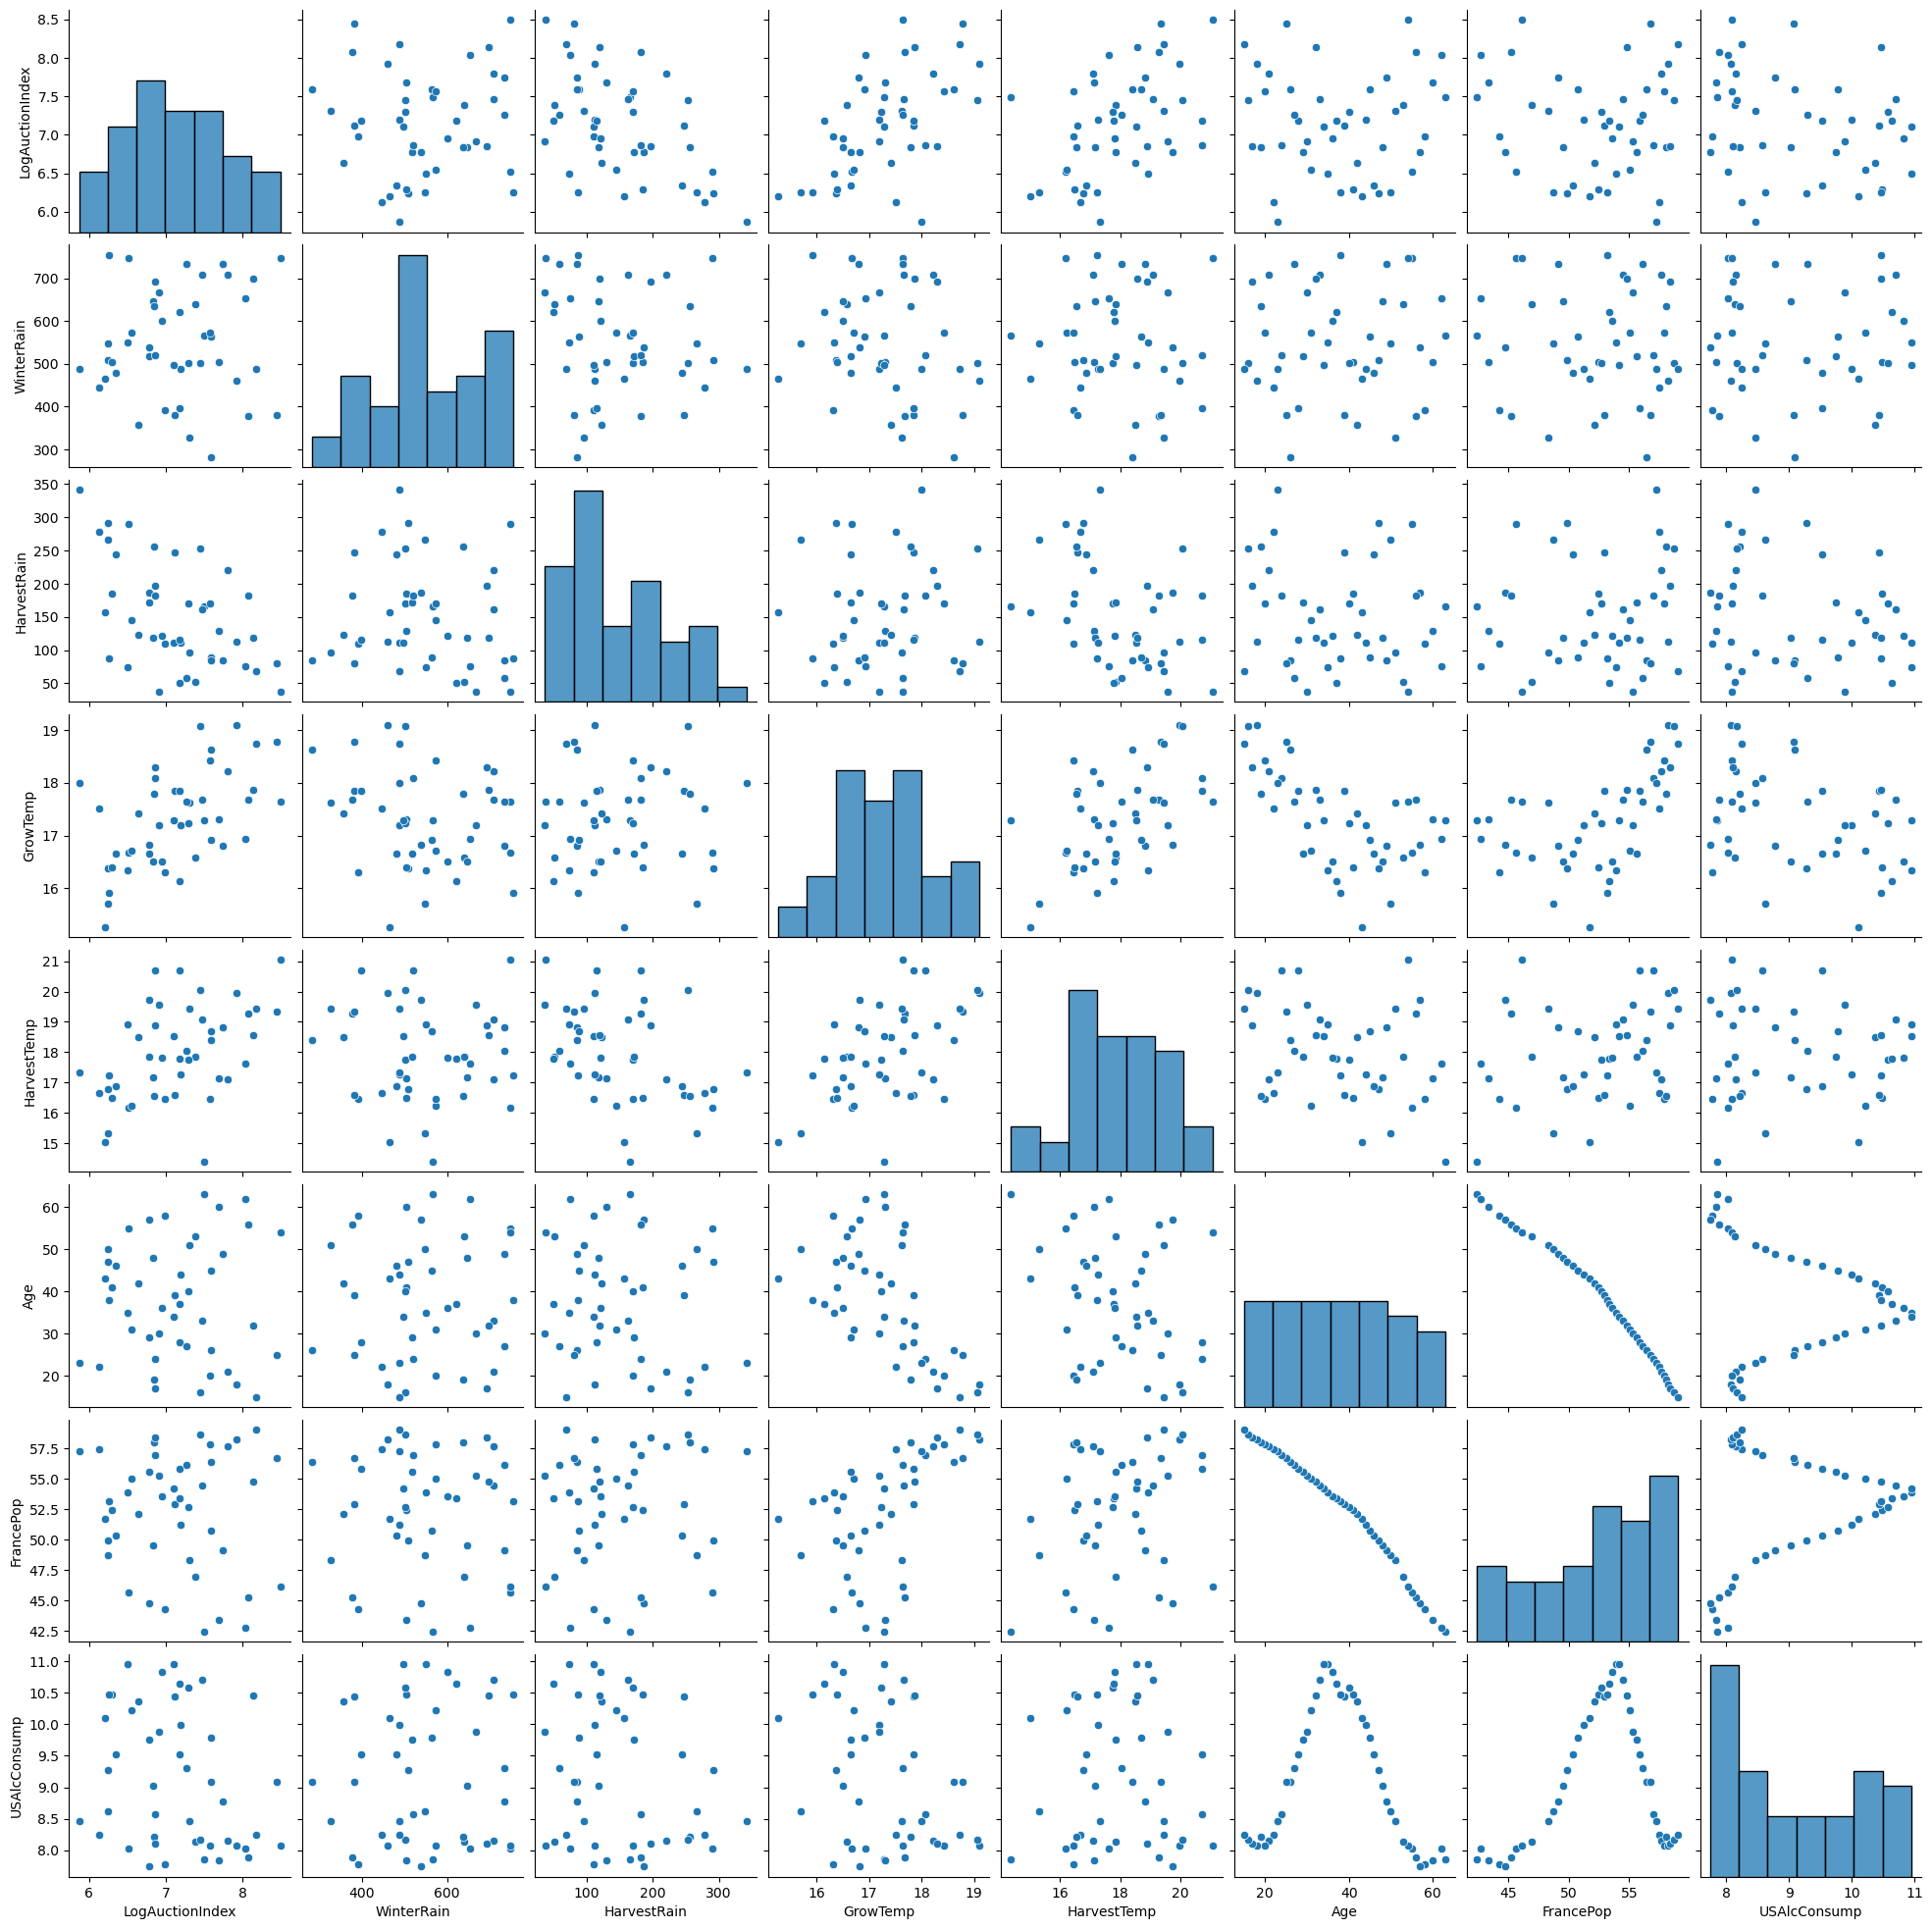

In [5]:
sns.pairplot(wine.iloc[:,1:9],diag_kind='hist') # try diag_kind='hist' for histograms

In [6]:
# If you apply .corr() directly to your dataframe, 
# it will return all pairwise correlations between your columns;
wine.corr()

,Year,LogAuctionIndex,WinterRain,HarvestRain,GrowTemp,HarvestTemp,Age,FrancePop,USAlcConsump
Year,1.000000,-0.011346,-0.032424,0.128569,0.600924,0.277000,-1.000000,0.986137,0.131949
LogAuctionIndex,-0.011346,1.000000,0.058326,-0.525882,0.559727,0.469832,0.011346,-0.076993,-0.271188
WinterRain,-0.032424,0.058326,1.000000,-0.120258,-0.214181,-0.046874,0.032424,-0.045196,0.004174
HarvestRain,0.128569,-0.525882,-0.120258,1.000000,0.036437,-0.410439,-0.128569,0.112394,-0.220185
GrowTemp,0.600924,0.559727,-0.214181,0.036437,1.000000,0.513076,-0.600924,0.516918,-0.352116
HarvestTemp,0.277000,0.469832,-0.046874,-0.410439,0.513076,1.000000,-0.277000,0.250442,-0.035964
Age,-1.000000,0.011346,0.032424,-0.128569,-0.600924,-0.277000,1.000000,-0.986137,-0.131949
FrancePop,0.986137,-0.076993,-0.045196,0.112394,0.516918,0.250442,-0.986137,1.000000,0.269647
USAlcConsump,0.131949,-0.271188,0.004174,-0.220185,-0.352116,-0.035964,-0.131949,0.269647,1.000000


## 1. MLR (with only numerical variables)

### Dataset train-test splitting

Next, we will split the dataset into a training set and a test set. There are various ways of splitting the dataset, we will first do an example of chronological separation. Eventually we'll cover randomized splitting as well.

We can do chronological splitting sing Boolean predicates, the same way we used them in the last lab:
- A & B
- A | B
- A == B
- A <= B
- A > B

 

In [7]:
wine_train = wine[wine['Year'] <= 1985]
wine_test = wine[wine['Year'] > 1985]

len(wine_train), len(wine_test)

(31, 15)

In [8]:
### produce wine_train2 which consists of wine that's older than 40
wine_train2 = wine[wine['Age'] > 40]

### How many rows does this dataset have? 
len(wine_train2)

20

In [9]:
## produce wine.train3 which is composed of wine less than Year 1985 or older than year 1990. 
wine_train3 = wine[(wine['Year'] <= 1985) | (wine['Year'] > 1990)]

# How many rows are there in the rest of the dataset, other than wine.train3? 
len(wine)-len(wine_train3)

5

### Training the model

We will show two ways of passing the data into the model:

- We can select the columns of interest that will constitute our matrices

- Or we can use syntaxis that follows R-style formulas




### 1) Training the model (matrix style)

https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html

In [10]:
# Import the library that contains all the functions/modules related to the regression model
import statsmodels.api as sm

# Choose the features to be used
cols = ['WinterRain', 'HarvestRain', 'GrowTemp', 'HarvestTemp', 'Age', 'FrancePop', 'USAlcConsump']
X_train = wine_train[cols]
y_train = wine_train['LogAuctionIndex']

# We must add an intercept as the standard model doesn't automatically fit one
X_train = sm.add_constant(X_train)
X_train

,const,WinterRain,HarvestRain,GrowTemp,HarvestTemp,Age,FrancePop,USAlcConsump
0,1.0,566.4,165.5,17.28,14.39,63,42.46,7.85
1,1.0,653.3,75.6,16.94,17.64,62,42.75,8.03
2,1.0,504.3,129.5,17.30,17.13,60,43.43,7.84
3,1.0,390.8,110.4,16.31,16.47,58,44.31,7.77
4,1.0,538.8,187.0,16.82,19.72,57,44.79,7.74
5,1.0,377.0,182.6,17.68,19.28,56,45.24,7.89
6,1.0,748.2,290.6,16.67,16.18,55,45.68,8.02
7,1.0,747.8,37.7,17.64,21.05,54,46.16,8.08
8,1.0,639.4,51.8,16.58,17.86,53,47.00,8.13
9,1.0,326.5,96.1,17.63,19.43,51,48.31,8.46


In [11]:
# Fit the data to the model
model1 = sm.OLS(y_train, X_train).fit() #ordinary least square
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:        LogAuctionIndex   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     12.31
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           1.86e-06
Time:                        15:08:34   Log-Likelihood:                -5.0600
No. Observations:                  31   AIC:                             26.12
Df Residuals:                      23   BIC:                             37.59
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -4.9663      9.382     -0.529   

### Plot the coefficients and the confidence intervals
In `R` and `ggplot2`, one can use function `ggcoef` to create such graph easily. However, there is no simple solution to this task in Python. The code below is a user-defined code credit to Jessica Forrest-Baldini
(https://medium.com/analytics-vidhya/create-your-own-coefficient-plot-function-in-python-aadb9fe27a77). It involves some work with `Matplotlib`. You are encouraged to figure out why the code works.

In [12]:
import matplotlib.pyplot as plt
def coefplot(results):
    '''
    Takes in results of OLS model and returns a plot of 
    the coefficients with 95% confidence intervals.
    
    Removes intercept, so if uncentered will return error.
    '''
    # Create dataframe of results summary 
    coef_df = pd.DataFrame(results.summary().tables[1].data)
    
    # Add column names
    coef_df.columns = coef_df.iloc[0]

    # Drop the extra row with column labels
    coef_df=coef_df.drop(0)

    # Set index to variable names 
    coef_df = coef_df.set_index(coef_df.columns[0])

    # Change datatype from object to float
    coef_df = coef_df.astype(float)

    # Get errors; (coef - lower bound of conf interval)
    errors = coef_df['coef'] - coef_df['[0.025']
    
    # Append errors column to dataframe
    coef_df['errors'] = errors

    # Drop the constant for plotting
    coef_df = coef_df.drop(['const'])

    # Sort values by coef ascending
    coef_df = coef_df.sort_values(by=['coef'])

    ### Plot Coefficients ###

    # x-labels
    variables = list(coef_df.index.values)
    
    # Add variables column to dataframe
    coef_df['variables'] = variables
    
    # Set sns plot style back to 'poster'
    # This will make bars wide on plot
    sns.set_context("poster")

    # Define figure, axes, and plot
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Error bars for 95% confidence interval
    # Can increase capsize to add whiskers
    coef_df.plot(x='variables', y='coef', kind='bar',
                 ax=ax, color='none', fontsize=22, 
                 ecolor='steelblue',capsize=0,
                 yerr='errors', legend=False)
    
    # Set title & labels
    plt.title('Coefficients of Features w/ 95% Confidence Intervals',fontsize=30)
    ax.set_ylabel('Coefficients',fontsize=22)
    ax.set_xlabel('',fontsize=22)
    
    # Coefficients
    ax.scatter(x=np.arange(coef_df.shape[0]), 
               marker='o', s=80, 
               y=coef_df['coef'], color='steelblue')
    
    # Line to define zero on the y-axis
    ax.axhline(y=0, linestyle='--', color='red', linewidth=1)
    
    return plt.show()


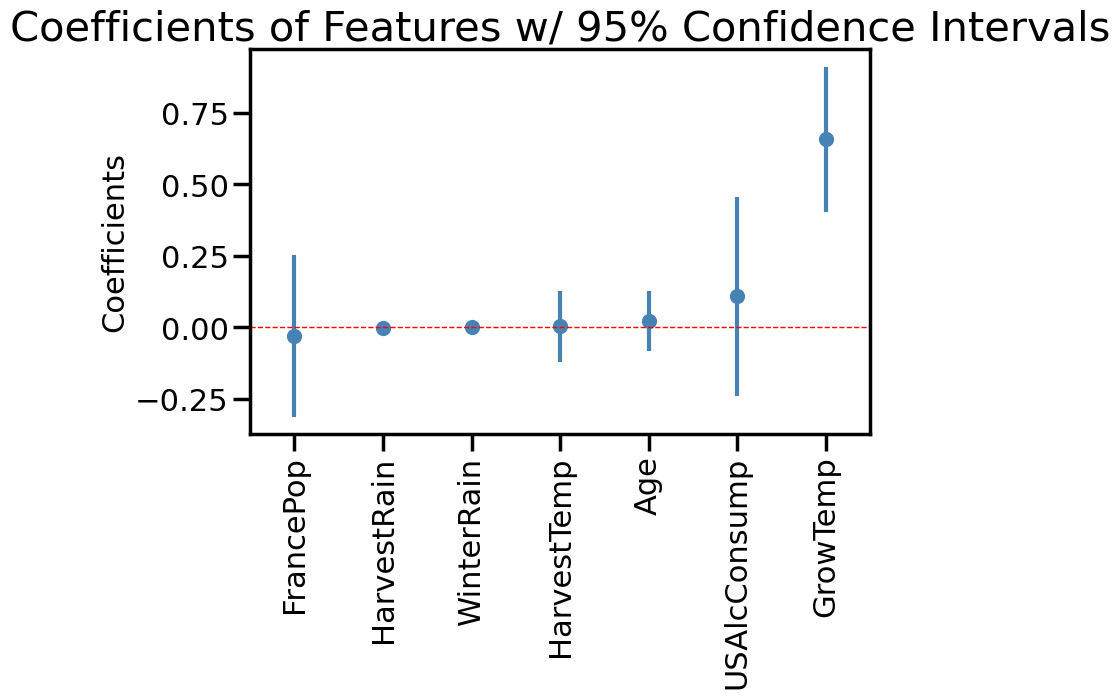

In [13]:
import seaborn as sns

coefplot(model1)

### 2) Training the model (using R-style formulas)

https://www.statsmodels.org/stable/example_formulas.html#categorical-variables

One of the main advantages of using this type of notation is the fact that categorical variables are handled automatically. 

Furthermore, the constant representing the intercept is generated by default in `smf.ols`.

For the remaineder of this lab, we will stick with the formula style notation as presented below:

In [14]:
import statsmodels.formula.api as smf

ols = smf.ols(formula='LogAuctionIndex ~ WinterRain + HarvestRain + GrowTemp + HarvestTemp + Age + FrancePop + USAlcConsump', 
                 data=wine_train)
model1 =ols.fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:        LogAuctionIndex   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     12.31
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           1.86e-06
Time:                        15:08:45   Log-Likelihood:                -5.0600
No. Observations:                  31   AIC:                             26.12
Df Residuals:                      23   BIC:                             37.59
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -4.9663      9.382     -0.529   

### Evaluating the model

If we want to use evaluation metrics that are not contained in the standard package, such as Out-of-sample R^2, we can manipulate our dataframe's columns and take advantage of `numpy's` matrix operation functions

In [17]:
# compute out-of-sample R-squared using the test set
def OSR2(model, df_train, df_test, dependent_var):   
    y_test = df_test[dependent_var]
    y_pred = model.predict(df_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(df_train[dependent_var]))**2)    
    return 1 - SSE/SST

In [18]:
OSR2(model1, wine_train, wine_test, 'LogAuctionIndex')

0.5377506779455685


    
### [Sidenote - Programming Exploration]

Generally speaking, there are two types of programming exploration: 

1. Finding which function to utilize
2. Understanding how to use a function once you've found it 

For 1   -- Try to target the problem you want to address as succinctly as possible in google.

---------- Read the description of the function and what it returns

For 2   -- What to do with new functions that you've never seen before? 

---------- Read the arguments carefully, look at examples, try it out and test output

</font>

### Variance Inflation Factor (VIF)

In [19]:
# calculate Variance Inflation Factor for each explanatory variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

# The dataframe passed to VIF must include the intercept term. We add it the same way we did before.
def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)

cols = ['WinterRain', 'HarvestRain', 'GrowTemp', 'HarvestTemp', 'Age', 'FrancePop', 'USAlcConsump']
VIF(wine_train, cols)

WinterRain       1.295370
HarvestRain      1.578682
GrowTemp         1.700079
HarvestTemp      2.198191
Age             66.936256
FrancePop       81.792302
USAlcConsump    10.441217
dtype: float64

### A better model...

In [20]:
# remove FrancePop because of its high VIF
model2 = smf.ols(formula='LogAuctionIndex ~ WinterRain + HarvestRain + GrowTemp + HarvestTemp + Age + USAlcConsump',
                 data=wine_train).fit()
print(model2.summary())

cols = ['WinterRain', 'HarvestRain', 'GrowTemp', 'HarvestTemp', 'Age', 'USAlcConsump']
VIF(wine_train, cols)

                            OLS Regression Results                            
Dep. Variable:        LogAuctionIndex   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     14.95
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           4.60e-07
Time:                        15:10:56   Log-Likelihood:                -5.0902
No. Observations:                  31   AIC:                             24.18
Df Residuals:                      24   BIC:                             34.22
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -6.8405      3.071     -2.228   

WinterRain      1.223155
HarvestRain     1.509070
GrowTemp        1.500905
HarvestTemp     2.122007
Age             8.580764
USAlcConsump    8.350251
dtype: float64

In [21]:
# remove USAlcConsump
model3 = smf.ols(formula='LogAuctionIndex ~ WinterRain + HarvestRain + GrowTemp + HarvestTemp + Age',
                 data=wine_train).fit()
print(model3.summary())

cols = ['WinterRain', 'HarvestRain', 'GrowTemp', 'HarvestTemp', 'Age']
VIF(wine_train, cols)

                            OLS Regression Results                            
Dep. Variable:        LogAuctionIndex   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     18.30
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           1.21e-07
Time:                        15:10:59   Log-Likelihood:                -5.3480
No. Observations:                  31   AIC:                             22.70
Df Residuals:                      25   BIC:                             31.30
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -5.2152      1.672     -3.119      

WinterRain     1.126094
HarvestRain    1.488511
GrowTemp       1.498590
HarvestTemp    2.002247
Age            1.045928
dtype: float64

In [22]:
# remove HarvestTemp
model4 = smf.ols(formula='LogAuctionIndex ~ WinterRain + HarvestRain + GrowTemp + Age',
                 data=wine_train).fit()
print(model4.summary())

cols = ['WinterRain', 'HarvestRain', 'GrowTemp', 'Age']
VIF(wine_train, cols)

                            OLS Regression Results                            
Dep. Variable:        LogAuctionIndex   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     23.78
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           2.31e-08
Time:                        15:11:01   Log-Likelihood:                -5.3569
No. Observations:                  31   AIC:                             20.71
Df Residuals:                      26   BIC:                             27.88
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -5.2164      1.640     -3.180      

WinterRain     1.110834
HarvestRain    1.116268
GrowTemp       1.035367
Age            1.029810
dtype: float64

### Feature Engineering

In [23]:
# Let us add an interaction term of GrowTemp and Age, and test its predictive power
model5 = smf.ols(formula='LogAuctionIndex ~ WinterRain * HarvestRain + GrowTemp + Age',
                 data=wine_train).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:        LogAuctionIndex   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     20.33
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           4.41e-08
Time:                        15:11:05   Log-Likelihood:                -4.0580
No. Observations:                  31   AIC:                             20.12
Df Residuals:                      25   BIC:                             28.72
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -5

## 2. MLR (with numerical + categorical variables)

For this part, we will use a second dataset, `wine_disagg.csv`, which contains additional information related to the Wineries. The `Winery` variable is a `string object`, but we can do some transformations that will help us fit it into the continuous model

In [24]:
wine_new = pd.read_csv("wine_disagg.csv")
wine_new_train = wine_new[wine_new['Year'] <= 1985]
wine_new_test = wine_new[wine_new['Year'] > 1985]

wine_new.info()
wine_new.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Winery        147 non-null    object 
 1   Year          147 non-null    int64  
 2   Age           147 non-null    int64  
 3   LogAuction    147 non-null    float64
 4   WinterRain    147 non-null    float64
 5   HarvestRain   147 non-null    float64
 6   GrowTemp      147 non-null    float64
 7   HarvestTemp   147 non-null    float64
 8   FrancePop     147 non-null    float64
 9   USAlcConsump  147 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 11.6+ KB


,Winery,Year,Age,LogAuction,WinterRain,HarvestRain,GrowTemp,HarvestTemp,FrancePop,USAlcConsump
0,Cheval Blanc,1952,63,6.653108,566.4,165.5,17.28,14.39,42.46,7.85
1,Lafite-Rothschild,1952,63,6.861502,566.4,165.5,17.28,14.39,42.46,7.85
2,Cheval Blanc,1953,62,6.664192,653.3,75.6,16.94,17.64,42.75,8.03
3,Cheval Blanc,1955,60,6.311426,504.3,129.5,17.30,17.13,43.43,7.84
4,Lafite-Rothschild,1955,60,6.550209,504.3,129.5,17.30,17.13,43.43,7.84


In [25]:
# Simple regression using new data, not yet incorporating the Winery variable
modOld = smf.ols(formula='LogAuction ~ WinterRain + HarvestRain + GrowTemp + Age',
                 data=wine_new_train).fit()
print(modOld.summary())

                            OLS Regression Results                            
Dep. Variable:             LogAuction   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     5.567
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           0.000539
Time:                        15:11:10   Log-Likelihood:                -112.14
No. Observations:                  83   AIC:                             234.3
Df Residuals:                      78   BIC:                             246.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.2184      3.431     -0.064      

In [26]:
# compute the out-of-sample R squared
OSR2(modOld,wine_new_train, wine_new_test, 'LogAuction')

-0.5558862240672195

Next, let us plot the price of the wine versus year, by different wineries

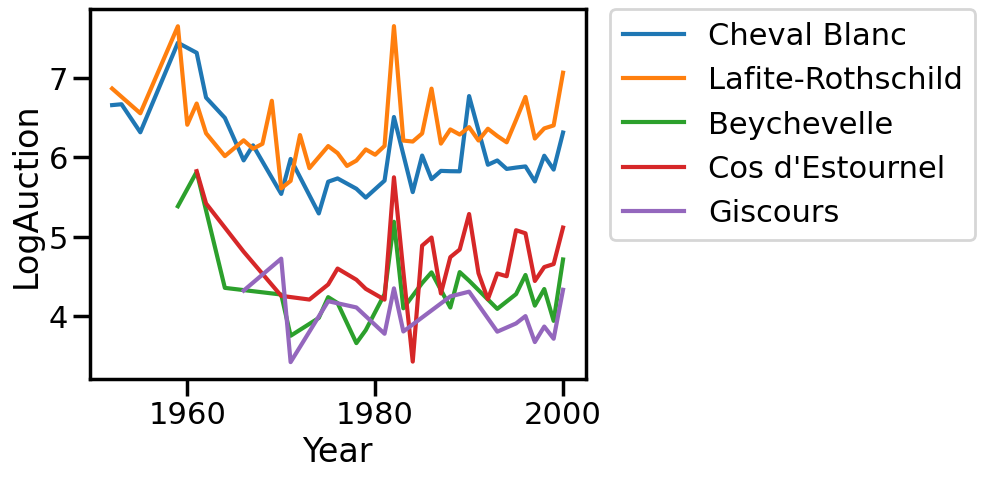

In [27]:
#sns.set_theme(style="darkgrid")
# Load an example dataset with long-form data
#fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
g = sns.lineplot(x="Year", y="LogAuction", hue="Winery", data=wine_new)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # This line is to display the lengend out of the graph region.

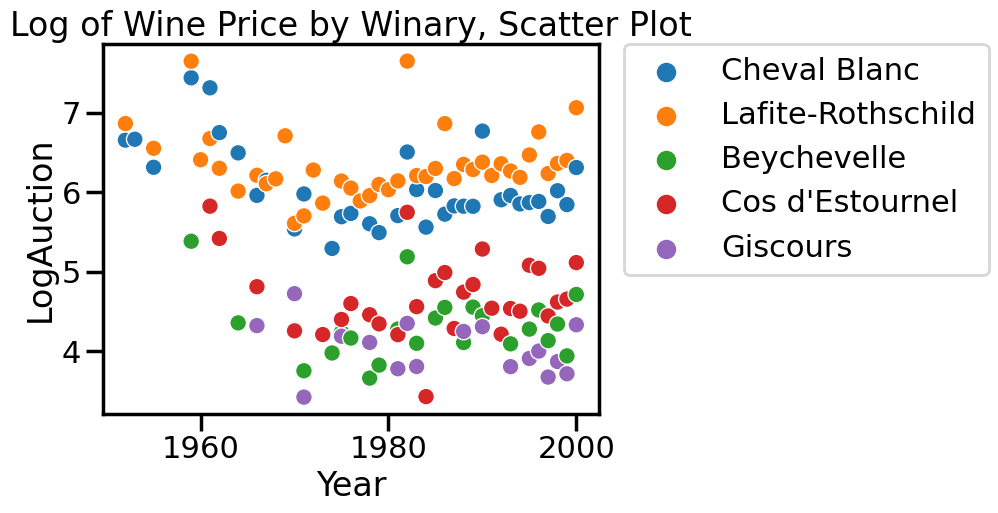

In [28]:
# Plot the responses for different events and regions
g = sns.scatterplot(x="Year", y="LogAuction", hue="Winery", data=wine_new).set_title('Log of Wine Price by Winary, Scatter Plot')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 

### Two Wineries
Before constructing a complete model for all the wineries, let's first attempt to regress on only 2 wineries. We pick Cheval Blanc and Cos d'Estournel as an example

,Winery,Year,Age,LogAuction,WinterRain,HarvestRain,GrowTemp,HarvestTemp,FrancePop,USAlcConsump
73,Cos d'Estournel,1983,32,4.558498,698.3,119.3,17.87,18.57,54.77,10.46
76,Cheval Blanc,1984,31,5.558641,572.6,144.8,16.71,16.24,55.03,10.22
77,Cos d'Estournel,1984,31,3.426865,572.6,144.8,16.71,16.24,55.03,10.22
80,Cheval Blanc,1985,30,6.018934,667.1,37.2,17.19,19.56,55.28,9.88
81,Cos d'Estournel,1985,30,4.885072,667.1,37.2,17.19,19.56,55.28,9.88


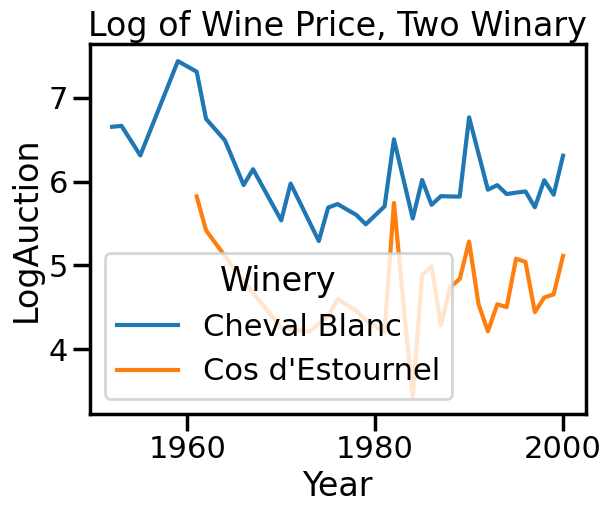

In [29]:
wine_two = wine_new[(wine_new['Winery'] == 'Cheval Blanc') | (wine_new['Winery'] == 'Cos d\'Estournel')]

g = sns.lineplot(x="Year", y="LogAuction", hue="Winery", data=wine_two).set_title('Log of Wine Price, Two Winary')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 

wine_two_train = wine_two[wine_two['Year'] <= 1985]
wine_two_test = wine_two[wine_two['Year'] > 1985]
wine_two_train.tail()

### Passing a categorical variable
To use a categorical variables like `Winery`, we can simply pass it to the formula, and `smf.ols` will handle the variable.

In [30]:
modTwo = smf.ols(formula='LogAuction ~ Winery + WinterRain + HarvestRain + GrowTemp + Age',
                 data=wine_two_train).fit()
print(modTwo.summary())

                            OLS Regression Results                            
Dep. Variable:             LogAuction   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     35.55
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           1.62e-11
Time:                        15:11:26   Log-Likelihood:                -13.178
No. Observations:                  35   AIC:                             38.36
Df Residuals:                      29   BIC:                             47.69
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

### More Wineries
Now let's expand to the complete set of values that `Winery` can take:

In [31]:
modNew = smf.ols(formula='LogAuction ~ Winery + WinterRain + HarvestRain + GrowTemp + Age',
                 data=wine_new_train).fit()
print(modNew.summary())

                            OLS Regression Results                            
Dep. Variable:             LogAuction   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     52.68
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           1.73e-27
Time:                        15:11:30   Log-Likelihood:                -43.659
No. Observations:                  83   AIC:                             105.3
Df Residuals:                      74   BIC:                             127.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

### Evaluate our final model

In [32]:
# compute out-of-sample R squared
OSR2(modNew, wine_new_train, wine_new_test, 'LogAuction')

0.806770952597956